> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Style and size of graph

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,8)})

In [2]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#importing csv dataset

df = pd.read_csv('tmdb-movies.csv')
print("Original TMDB Dataset contains (Rows,Columns) : ",df.shape)
df.shape

Original TMDB Dataset contains (Rows,Columns) :  (10866, 21)


(10866, 21)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
#check basis information of the dataset
print("Quick look at the dataset for some statistical values: \n\n")
df.describe()

Quick look at the dataset for some statistical values: 




,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
#Check column names and types
print("Column name with number of null values, count of value in each column and data type: \n\n")
df.info()

Column name with number of null values, count of value in each column and data type: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-n

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [5]:
#drop not required columns for this analysis

df.drop(['imdb_id','homepage','tagline','overview'], axis=1, inplace=True)
print("Sample first five rows after deleting - 'imdb_id','homepage','tagline','overview':\n\n ")
df.head()

Sample first five rows after deleting - 'imdb_id','homepage','tagline','overview':

 


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
print("Count of 0 values in columns:\n\n ")
df.isin([0]).sum()

Count of 0 values in columns:

 


id                         0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
director                   0
keywords                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [7]:
#check NaN values
print("Count of NaN values in columns:\n\n ")
df.isna().sum()

Count of NaN values in columns:

 


id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.mean()

id              6.606418e+04
popularity      6.464410e-01
budget          1.462570e+07
revenue         3.982332e+07
runtime         1.020709e+02
vote_count      2.173897e+02
vote_average    5.974922e+00
release_year    2.001323e+03
budget_adj      1.755104e+07
revenue_adj     5.136436e+07
dtype: float64

In [9]:
#replace 0 values with NaN
df['budget'] = df['budget'].replace(0,np.NAN)
df['budget_adj'] = df['budget_adj'].replace(0,np.NAN)
df['revenue'] = df['revenue'].replace(0,np.NAN)
df['revenue_adj'] = df['revenue_adj'].replace(0,np.NAN)

#Fill 0 values with min values
df.fillna(df.mean(), inplace=True)
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#check duplicate count
print("Duplicates are indicated by True:\n ")
(df.duplicated()).value_counts()

Duplicates are indicated by True:
 


False    10865
True         1
dtype: int64

In [11]:
#Delete rows with NaN values

df.dropna(inplace=True)
df.shape
print("Afetr Removing NaN (Rows,Columns) : ",df.shape)

Afetr Removing NaN (Rows,Columns) :  (8667, 17)


In [12]:
#Delete duplicates

df.drop_duplicates(inplace = True)
print("Afetr Removing Duplicate Values (Rows,Columns) : ",df.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (8666, 17)


In [13]:
# Changing the format of dates:
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'ignore')

In [14]:
print("Year range - ", df.release_year.min(),df.release_year.max())

Year range -  1960 2015


In [15]:
values = {'keywords': 'Keywords Missing', 'production_companies': 'production_companies Missing', 'cast': 'cast missing'}
df.fillna(value=values, inplace = True)

In [16]:
#check NaN values again
print("Count of NaN values in columns:\n\n ")
df.isna().sum()

Count of NaN values in columns:

 


id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [17]:
#function to convert float to int
def float_to_int(number):
    return np.int(number)

# Applying the function ot columns budget_adj and revenue_adj 
df['budget_adj'] = df['budget_adj'].apply(float_to_int)
df['revenue_adj'] = df['revenue_adj'].apply(float_to_int)

# Creating profit and adjusted profit columns
df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

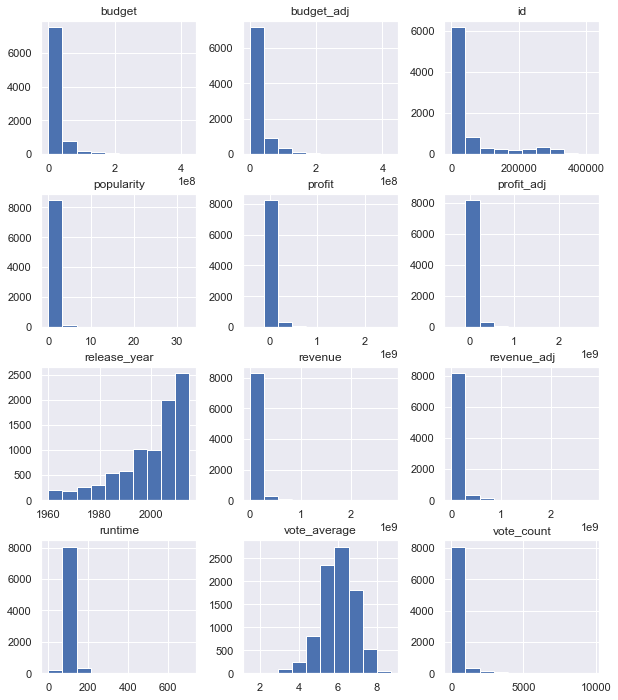

In [18]:
df.hist(figsize=(10,12));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1. Which Genres are more profitable in recent years?

Text(0.5, 1.0, 'most profitable genres')

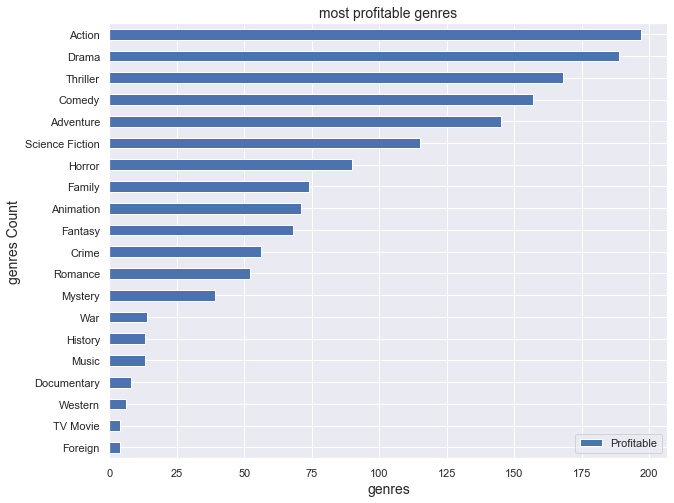

In [19]:
#Create a dataset for movies made $100M or more profit

df_profited = df[df['profit_adj'] >= 100000000]

#Create a subset of above dataset to limit that to recent years
df_recent_years = df_profited[df_profited['release_year'] >= 2009]

#Split Genres
df_genres = df_recent_years.assign(genres = df_recent_years['genres'].str.split('|')).explode('genres')

#Create a temporary dataset to plot
df_g = df_genres.groupby(['genres'])['release_year'].count().to_frame(name = 'Profitable')

df_g.sort_values(['Profitable'], ascending = False).head(20).plot(kind = 'barh')
plt.gca().invert_yaxis()
# Graph features
plt.xlabel('genres', fontsize = 14)
plt.ylabel('genres Count', fontsize = 14)
plt.title('most profitable genres', fontsize = 14)

### 2. What are the most profitable, highest revenue and highest budget movies?

#### 2a. Most Profitable Movies

Text(0.5, 1.0, 'highest profited movies')

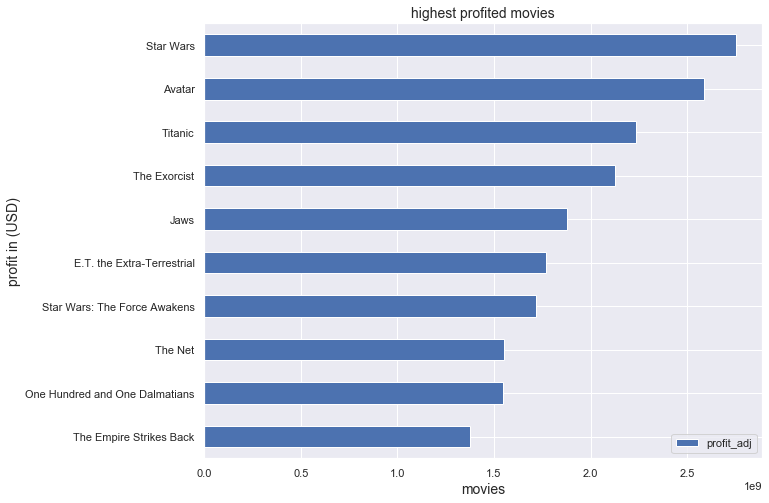

In [20]:
#create new dataset for movie profit calculation

df_movie_profit = pd.melt(df, id_vars = ['original_title'], value_vars = ['profit_adj'], value_name = 'profit_adj')

df_movie_profit.sort_values(['profit_adj'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title');
plt.gca().invert_yaxis()
# Graph features
plt.xlabel('movies', fontsize = 14)
plt.ylabel('profit in (USD)', fontsize = 14)
plt.title('highest profited movies', fontsize = 14)

#### 2b. High Revenue Movies

Text(0.5, 1.0, 'highest revenue movies')

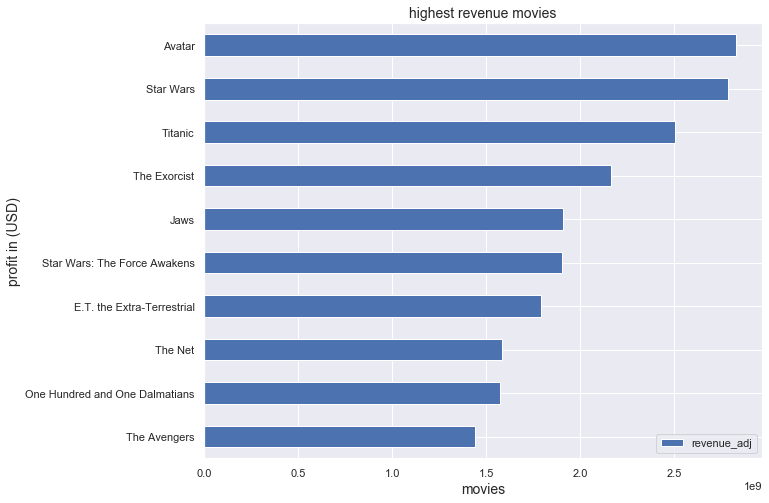

In [21]:
#create new dataset for movie revenue calculation
df_movie_revenue = pd.melt(df, id_vars = ['original_title'], value_vars = ['revenue_adj'], value_name = 'revenue_adj')

df.sort_values(['profit_adj'], ascending = False).head()
df_movie_revenue.sort_values(['revenue_adj'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title');

plt.gca().invert_yaxis()
# Graph features
plt.xlabel('movies', fontsize = 14)
plt.ylabel('profit in (USD)', fontsize = 14)
plt.title('highest revenue movies', fontsize = 14)

#### 2c. High Budget Movies

Text(0.5, 0, 'Movie')

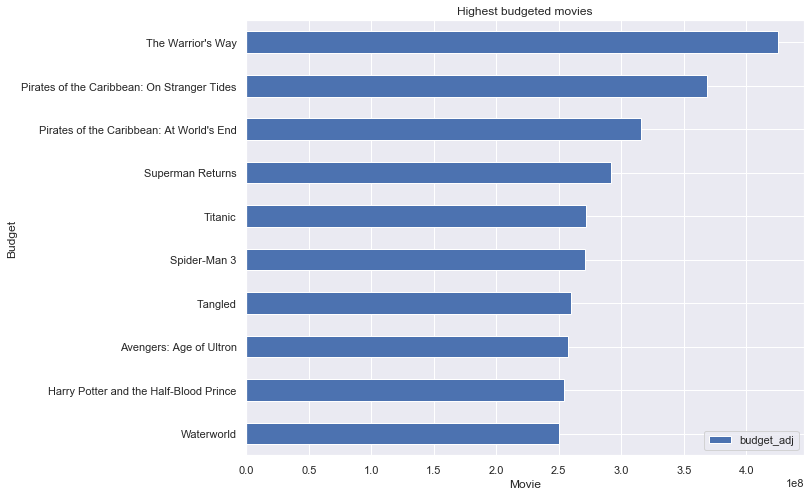

In [22]:
#create new dataset for movie budget calculation
df_movie_budget = pd.melt(df, id_vars = ['original_title'], value_vars = ['budget_adj'], value_name = 'budget_adj')

#df.sort_values(['profit_adj'], ascending = False).head()
df_movie_budget.sort_values(['budget_adj'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title');

plt.gca().invert_yaxis()
plt.title("Highest budgeted movies")
plt.ylabel("Budget")
plt.xlabel("Movie")

### 3. What is the corelation between budget, revenue and profit?

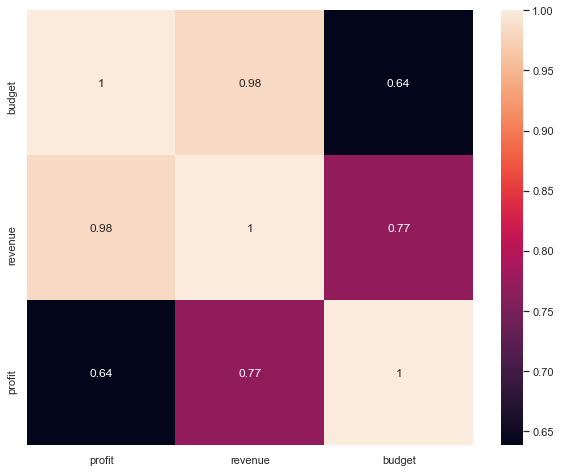

In [23]:
df_invest = pd.DataFrame(df_recent_years,columns=['profit_adj','revenue_adj','budget_adj'])

cor = df_invest.corr()

x_axis_labels = ['profit','revenue','budget'] # labels for x-axis
y_axis_labels = ['budget','revenue','profit'] # labels for y-axis
sns.heatmap(cor, annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

### 4. Is that certain casts and director work together to make profitable movies?

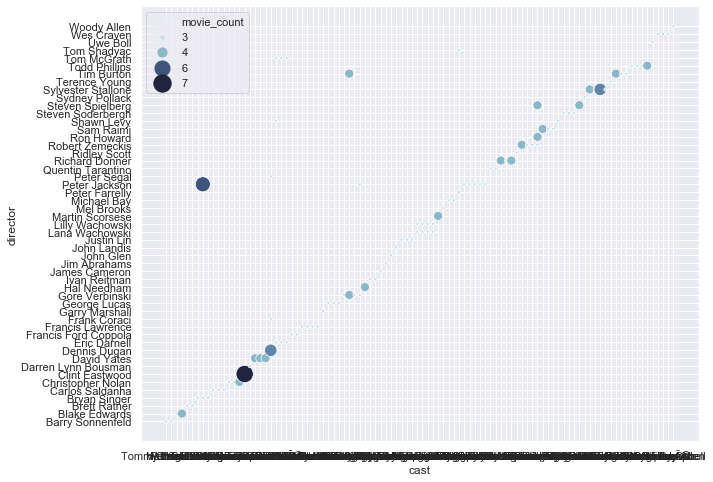

In [45]:
#Split Production Companies

df_cast = df_profited.assign(cast = df_profited['cast'].str.split('|')).explode('cast')

df_cast_dir = df_cast.assign(director = df_cast['director'].str.split('|')).explode('director')

df_cast_dir['cast_director'] = df_cast_dir['director'] + ";" + df_cast_dir['cast']

df_merge = df_cast_dir.groupby('cast_director').agg(movie_count=('original_title', 'count'),cast=('cast','first'),director=('director','first'))

df_merge = df_merge[df_merge.movie_count > 2]
df_merge.drop(df_merge.index)
df_merge.sort_values(['movie_count'], ascending = False).head(200)

n = df_merge['movie_count'] * 0.02

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.scatterplot(x="cast", y="director",
                     hue="movie_count", size="movie_count",
                     palette=cmap, sizes=(10, 300),
                     data=df_merge)
plt.show()

### 4. What is the highest revenue movie in each of recent years?

Text(0.5, 1, 'most profitable movies per year')

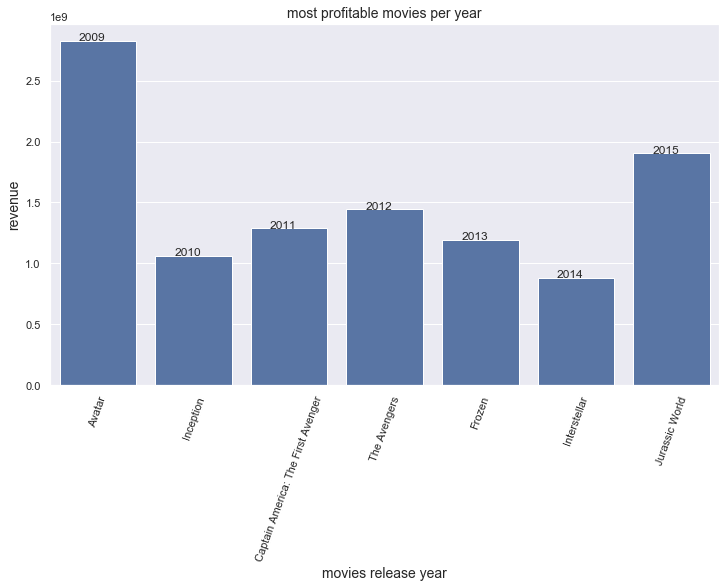

In [43]:
df_max_rev = df_recent_years.groupby(['release_year']).agg(revenue_max=('revenue_adj', max),movie=('original_title', 'first'),year=('release_year',min))

high_revenue = df_max_rev['revenue_max'].to_numpy()
movies = df_max_rev['movie'].to_numpy()
year = df_max_rev['year'].to_numpy()

g = sns.barplot(data=df_max_rev,x = movies, y = high_revenue, color = "b");
plt.xticks(rotation=70)
plt.tight_layout()
i = 0

for p in g.patches:
        x = p.get_x() + 0.2
        y = p.get_y() + p.get_height()
        g.annotate(year[i], (x, y))
        i +=1
    
# Graph features
plt.xlabel('movies release year', fontsize = 14)
plt.ylabel('revenue', fontsize = 14)
plt.title('most profitable movies per year', fontsize = 14)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!